In [1]:
import math
import pydicom
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

### Load Image

In [2]:
DICOM_PATH = "images/DICOMOBJ/test-L2"
IS_ROTATE = False 
# arrays = []

dicom_data = pydicom.dcmread(DICOM_PATH)
arr = dicom_data.pixel_array
if IS_ROTATE:
    arr = ndimage.rotate(arr, 90)

### Helper Functions

In [3]:
def inv_lut(arr: np.array):
    max_pixel = arr.max()
    min_pixel = arr.min()
    return max_pixel - arr + min_pixel

def display(arr: np.array, axis=False) :
    plt.imshow(arr, cmap="gray")
    plt.axis(axis)

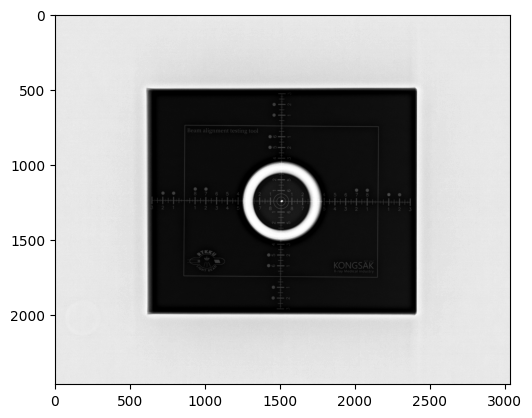

In [4]:
display(arr, True)

In [5]:
arr

array([[    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0, 15363, ..., 14615, 14301, 14558],
       ...,
       [    0,     0, 14958, ..., 14660, 14771, 14875],
       [    0,     0, 14460, ..., 15043, 14690, 14665],
       [    0,     0, 14078, ..., 14894, 14872, 15117]], dtype=uint16)

### Find Test-Tool

In [6]:
# assume crop if each size > 2,000 (not crop yet)
H, W = arr.shape
P = 0.24 # experimental number (Percent)
if (H*W) > (2000**2):
    arr = arr[int(H*P): int(H*(1-P)), int(W*P): int(W*(1-P))]
    H, W = arr.shape

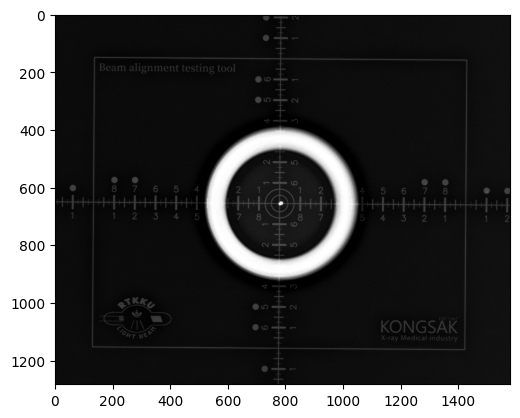

In [7]:
display(arr, True)

### Find Lines and Center of the Image

In [8]:
def most_common(focus_arr: np.array, axis=0) :
    """
    find most common pixel value in specific axis
    axis 0 = by col, axis 1 = by row
    return: most common pixel value
    """
    pixel_vals = np.argmax(focus_arr, axis=axis) # [b, w] color (if inv use argmin)
    unique_vals, counts = np.unique(pixel_vals, return_counts=True)
    most_common_idx = np.argmax(counts)
    pixel_val = unique_vals[most_common_idx]
    return pixel_val

- Find Center Line(Horizontal)

In [9]:
hp = int(0.2*H)
wp = int(0.06*W)

focus_l = arr[hp: H-hp, wp: wp*2]
focus_r = arr[hp: H-hp, W-(wp*2): W-wp]

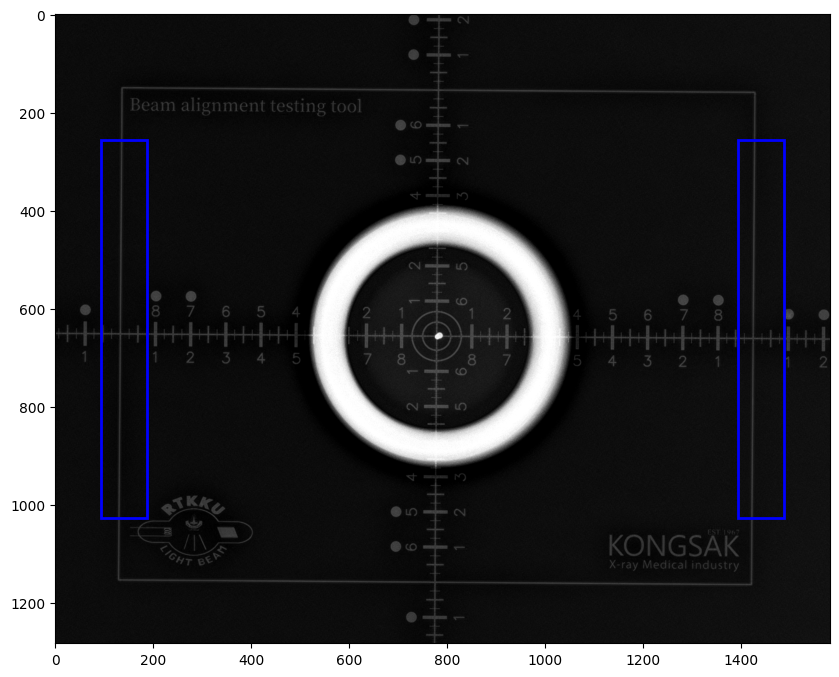

In [10]:
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(arr, cmap='gray')

# Top-Left(x, y), width, heigh
l_rec = patches.Rectangle((wp, hp), wp, H-2*hp, linewidth=2, edgecolor='blue', facecolor='none')
r_rec = patches.Rectangle((W-(wp*2), hp), (W-wp)-(W-(wp*2)), (H-hp)-hp, linewidth=2, edgecolor='blue', facecolor='none')
ax.add_patch(l_rec)
ax.add_patch(r_rec)

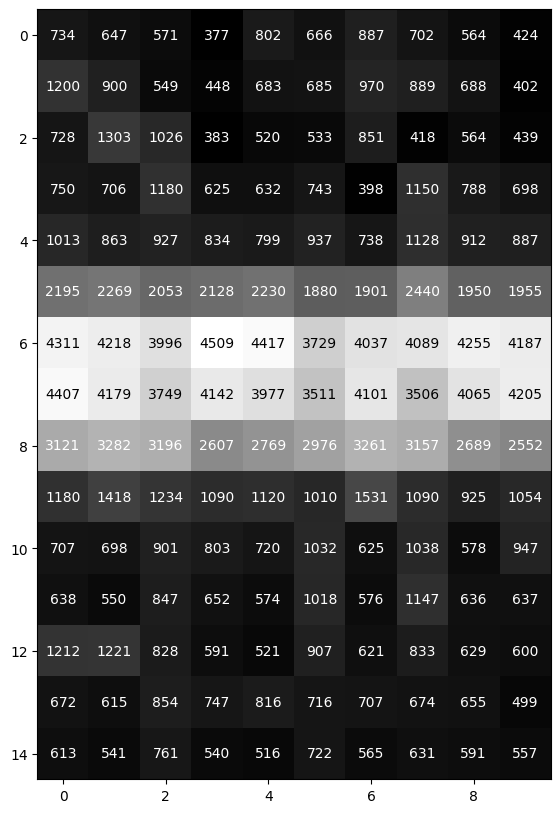

In [11]:
focus_v = arr[645: 660, 100: 110]

fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(focus_v, cmap='gray')

# Annotate each pixel with its value
for i in range(focus_v.shape[0]): 
    for j in range(focus_v.shape[1]):  
        text = f"{focus_v[i, j]}"
        if i == 6 or i == 7 :
            c = "black"
        else: 
            c = "white"
        ax.text(j, i, text, ha="center", va="center", color=c, fontsize=10)

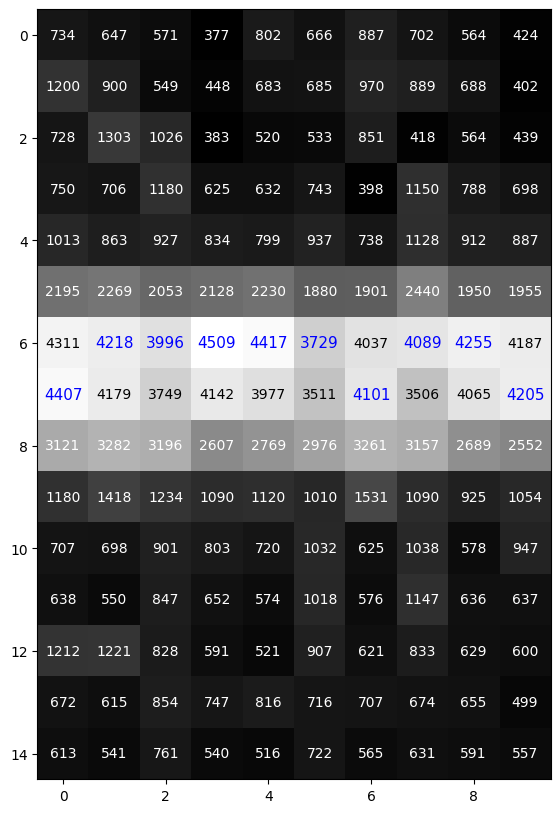

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(focus_v, cmap='gray')

max_c = np.argmax(focus_v, axis=0)
for i in range(focus_v.shape[0]): 
    for j in range(focus_v.shape[1]):  
        text = f"{focus_v[i, j]}"
        if i == 6 or i == 7 :
            c = "black"
        else: 
            c = "white"
        if i == max_c[j] :
            c = "blue"
            size = 11
        else :
            size = 10
        ax.text(j, i, text, ha="center", va="center", color=c, fontsize=size)

In [13]:
y1 = most_common(focus_l, axis=0) + hp # start at hp not 0
y2 = most_common(focus_r, axis=0) + hp 
y1, y2

(652, 661)

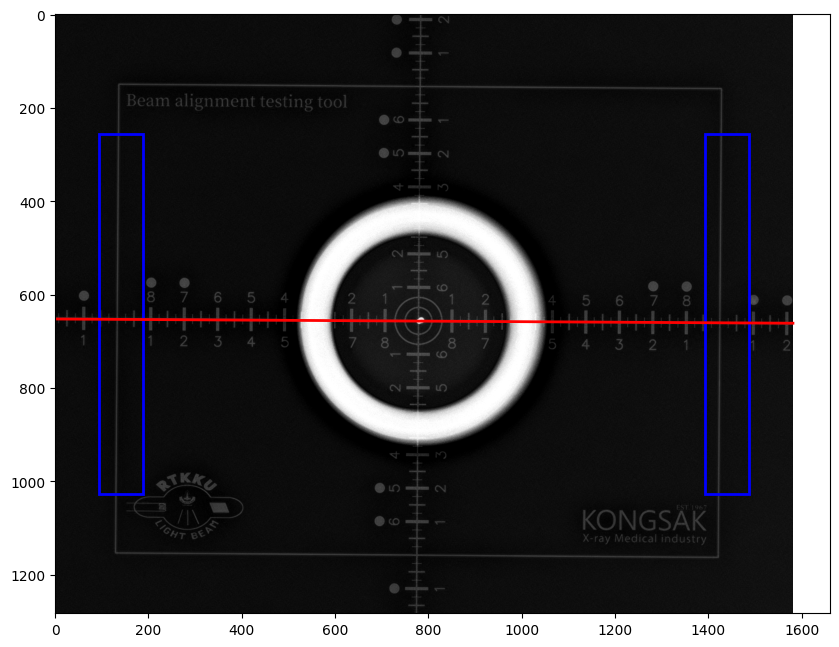

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(arr, cmap='gray')

# Top-Left(x, y), width, heigh
l_rec = patches.Rectangle((wp, hp), wp, H-2*hp, linewidth=2, edgecolor='blue', facecolor='none')
r_rec = patches.Rectangle((W-(wp*2), hp), (W-wp)-(W-(wp*2)), (H-hp)-hp, linewidth=2, edgecolor='blue', facecolor='none')
plt.plot([0, W], [y1, y2], linewidth=2, color="red")
ax.add_patch(l_rec)
ax.add_patch(r_rec)

In [ ]:
def find_center_line(arr: np.array):
    """
    find horizontal center line
    return (x1, y1), (x2, y2)
    """
    H, W = arr.shape
    hp = int(0.2*H)
    wp = int(0.06*W)

    # left point
    focus_l = arr[hp: H-hp, wp: wp*2]
    y1 = most_common(focus_l, axis=0) + hp
    
    # right point
    focus_r = arr[hp: H-hp, W-(wp*2): W-wp]
    y2 = most_common(focus_r, axis=0) + hp

    return (0, y1), (W-1, y2) # W-1 for visualize not over blank

In [36]:
def draw_line(arr, x1, y1, x2, y2, axis=False) :
    plt.imshow(arr, cmap="gray")
    plt.plot([x1, x2], [y1, y2], color='blue', linewidth=1)
    plt.axis(axis)

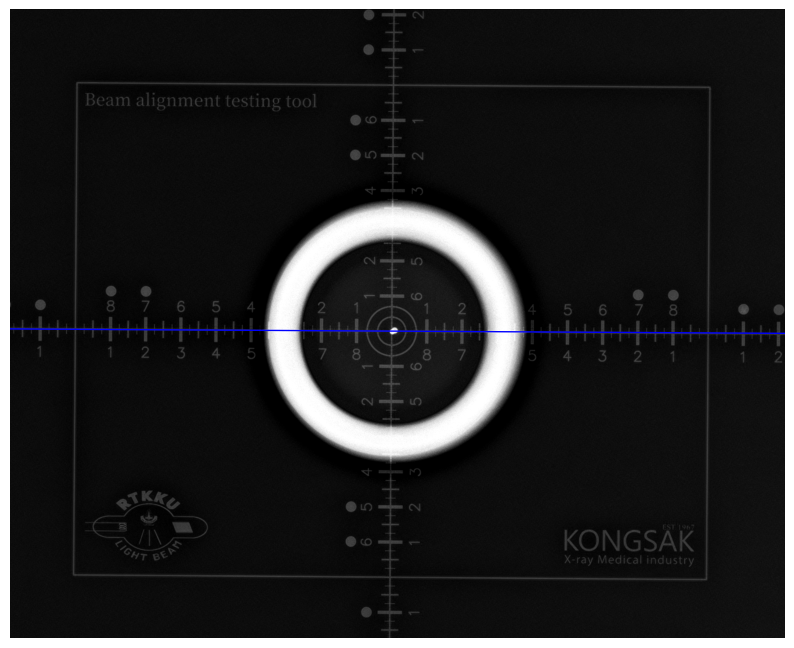

In [39]:
(x1, y1), (x2, y2) = find_center_line(arr)
plt.figure(figsize=(10, 10))
draw_line(arr, x1, y1, x2, y2)